In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import json

data = []
with open('/content/drive/MyDrive/DEV 교육/PROJECT/20160801~09,LIMIT50000.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

import pandas as pd

df = pd.DataFrame(data)


In [4]:

# 데이터 확인
df.head()

,fullVisitorId,visitId,visitNumber,visitStartTime,date,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,...,slot,gclId,adNetworkType,isVideoAd,transactions,transactionRevenue,totalTransactionRevenue,bounces,eventLabel,targetingCriteria
0,0288478011259077136,1470084717,1,1470084717,20160801,Internet Explorer,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0288478011259077136,1470084717,1,1470084717,20160801,Internet Explorer,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8520115029387302083,1470075581,4,1470075581,20160801,Chrome,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8520115029387302083,1470075581,4,1470075581,20160801,Chrome,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8341980690045636440,1470114192,1,1470114192,20160801,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['channelGrouping'].unique()

array(['Direct', 'Referral', 'Organic Search', 'Paid Search', 'Display',
       'Social', 'Affiliates'], dtype=object)

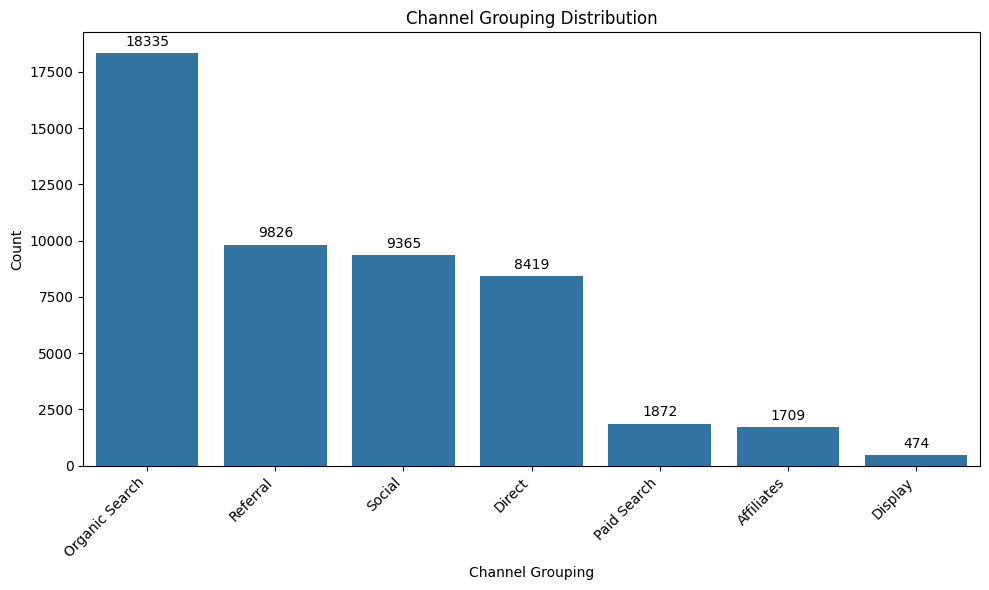

In [23]:
# 데이터 준비: 채널 그룹별로 count를 데이터프레임으로 만들기
channel_counts = df['channelGrouping'].value_counts().reset_index()
channel_counts.columns = ['channelGrouping', 'count']

# 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 키우기
sns.barplot(x='channelGrouping', y='count', data=channel_counts)

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 값 라벨 표시
for i, row in channel_counts.iterrows():
    plt.text(i, row['count'] + max(channel_counts['count'])*0.01, row['count'],
             ha='center', va='bottom')

plt.title('Channel Grouping Distribution')
plt.xlabel('Channel Grouping')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   fullVisitorId              50000 non-null  object
 1   visitId                    50000 non-null  object
 2   visitNumber                50000 non-null  object
 3   visitStartTime             50000 non-null  object
 4   date                       50000 non-null  object
 5   browser                    50000 non-null  object
 6   browserVersion             50000 non-null  object
 7   browserSize                50000 non-null  object
 8   operatingSystem            50000 non-null  object
 9   operatingSystemVersion     50000 non-null  object
 10  isMobile                   50000 non-null  bool  
 11  mobileDeviceBranding       50000 non-null  object
 12  mobileDeviceModel          50000 non-null  object
 13  mobileInputSelector        50000 non-null  object
 14  mobile

In [9]:
df.groupby('channelGrouping')['pageviews'].sum().sort_values(ascending=False)

,pageviews
channelGrouping,
Affiliates,8881930303030303030303030303030111111111111111...
Display,3111111111111112222222222222333333333333344444...
Paid Search,1919191919191919191919236191919191919191919191...
Referral,1919181823232424242424252532433535353535353549...
Organic Search,1822222220232323232722222222222739393939313131...
Direct,1818272716272331373636424241414141505050591331...
Social,1222332442777201516181818181818181818181818181...


In [10]:
df['pageviews'].describe()

,pageviews
count,49998
unique,81
top,1
freq,6144


In [12]:
df['pageviews'] = pd.to_numeric(df['pageviews'], errors='coerce')
df['pageviews'].describe()

,pageviews
count,49998.000000
mean,10.869175
std,16.835425
min,1.000000
25%,3.000000
50%,6.000000
75%,12.000000
max,188.000000


In [15]:
df.groupby('channelGrouping')['pageviews'].sum().sort_values(ascending=False)

,pageviews
channelGrouping,
Organic Search,250911.0
Referral,115938.0
Direct,104252.0
Social,33674.0
Paid Search,24520.0
Affiliates,10035.0
Display,4107.0


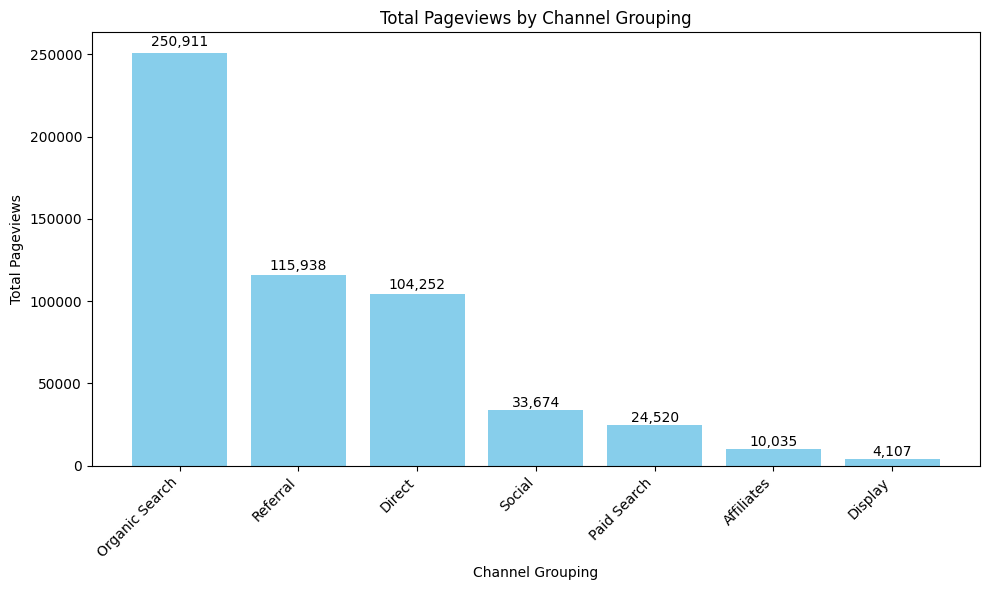

In [24]:
pageviews_by_channel = df.groupby('channelGrouping')['pageviews'].sum().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(pageviews_by_channel.index, pageviews_by_channel.values, color='skyblue')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 값 라벨 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f'{int(yval):,}',
             ha='center', va='bottom')

plt.title('Total Pageviews by Channel Grouping')
plt.xlabel('Channel Grouping')
plt.ylabel('Total Pageviews')
plt.tight_layout()
plt.show()

In [20]:
# 1. 채널별 총 페이지뷰 수
pageviews_per_channel = df.groupby('channelGrouping')['pageviews'].sum()

# 2. 채널별 세션 수
session_count_per_channel = df.groupby('channelGrouping')['channelGrouping'].count()

# 3. 세션당 페이지뷰 수 계산
pages_per_session = pageviews_per_channel / session_count_per_channel

# 결과 확인
print(pages_per_session.sort_values(ascending=False))

channelGrouping
Organic Search    13.684810
Paid Search       13.098291
Direct            12.382943
Referral          11.799104
Display            8.664557
Affiliates         5.871855
Social             3.595729
dtype: float64


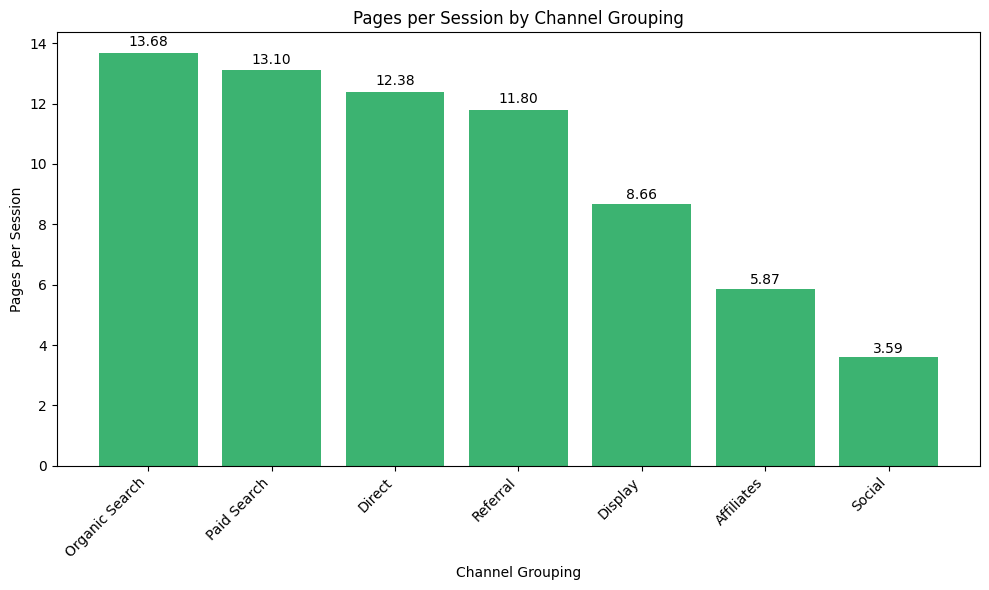

In [39]:
import matplotlib.pyplot as plt

# 정렬된 시리즈
pages_per_session_sorted = pages_per_session.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(pages_per_session_sorted.index, pages_per_session_sorted.values, color='mediumseagreen')

# 제목 및 레이블
plt.title('Pages per Session by Channel Grouping')
plt.xlabel('Channel Grouping')
plt.ylabel('Pages per Session')
plt.xticks(rotation=45, ha='right')

# 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f'{yval:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

                 유입량     페이지 뷰
organic search : 18,335(1)    250,911(1)     
Referral       : 9,826 (2)    115,938(2)  
social         : 9,365 (3)    33,674 (4)   
Direct         : 8,419 (4)    104,252(3)  
Paid Search    : 1,872 (5)    24,520 (5)  
Affliates      : 1,709 (6)    10,035 (6)  
Display        : 474   (7)    4,107  (7)  

세션당 페이지뷰 수  
Organic Search    13.684810  
Paid Search       13.098291  
Direct            12.382943  
Referral          11.799104  
Display            8.664557  
Affiliates         5.871855  
Social             3.595729  

인입량과 페이지뷰간의 관계는 비슷하였으나 실제 세션당 페이지 뷰의 수를 확인한 결과 Paid Search로 인입된 유저가 깊게 탐색하였고 social 과 Referral 즉 외부에서 인입된 유저는 방문은 많았으나 탐색이 얕은 점을 확인 하였다  

특히 Paid Search가 흥미로운 이유는
전체 방문 수는 적지만, 한 번 방문한 사용자는 더 많은 페이지를 보는 경향이 있어
이는 광고 타겟팅이 잘 되어 있다거나, 광고로 유입된 방문자는 관심도가 높다는 걸 의미할 수 있음.



조금더 깊이 확인하기 위해 전환율을 확인해 본다  

In [33]:
df['transactions'] = pd.to_numeric(df['transactions'], errors='coerce').fillna(0)
print(df['transactions'].value_counts())

transactions
0.0    48714
1.0     1284
2.0        2
Name: count, dtype: int64


In [35]:
#전환율
conversion_by_channel = df.groupby('channelGrouping').agg(
    sessions=('fullVisitorId', 'count'),          # 세션 수: 행 개수로 간주
    transactions=('transactions', 'sum')          # 총 거래 수
)

# 전환율 추가 (%)
conversion_by_channel['conversion_rate (%)'] = (conversion_by_channel['transactions'] / conversion_by_channel['sessions']) * 100

# 정렬해서 보기 좋게 출력
conversion_by_channel.sort_values(by='conversion_rate (%)', ascending=False)

,sessions,transactions,conversion_rate (%)
channelGrouping,,,
Referral,9826,611.0,6.218197
Direct,8419,240.0,2.850695
Display,474,13.0,2.742616
Organic Search,18335,424.0,2.312517
Affiliates,1709,0.0,0.000000
Paid Search,1872,0.0,0.000000
Social,9365,0.0,0.000000


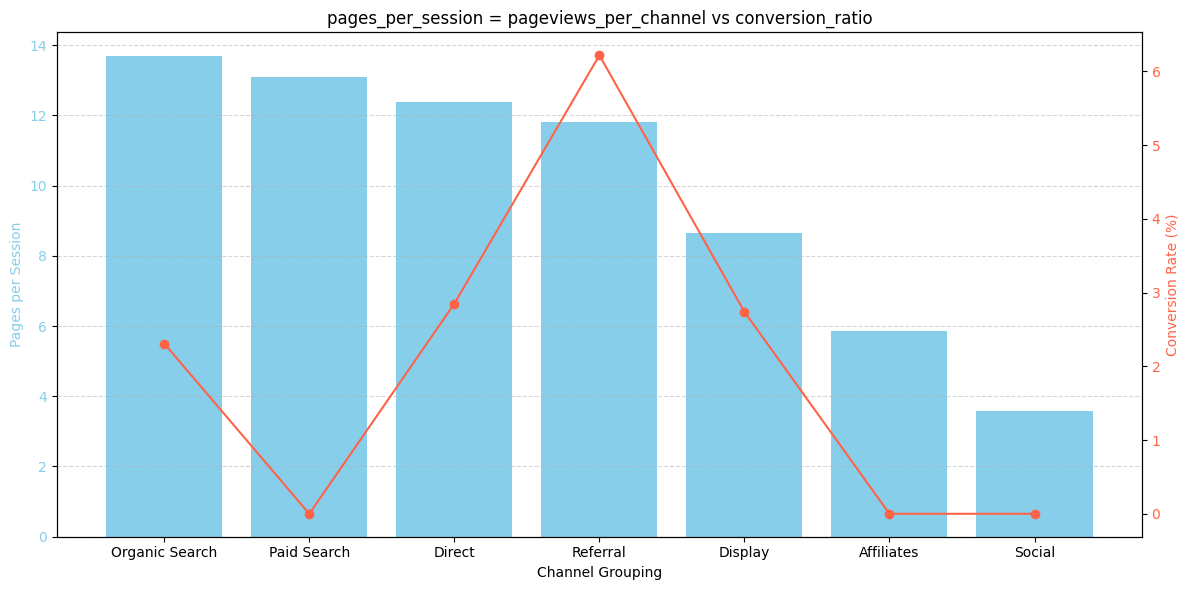

In [38]:
# 채널 순서 통일
channels = ['Organic Search', 'Paid Search', 'Direct', 'Referral', 'Display', 'Affiliates', 'Social']

# 세션당 페이지뷰 수 (기존 계산값)
pages_per_session = pd.Series({
    'Organic Search': 13.68,
    'Paid Search': 13.10,
    'Direct': 12.38,
    'Referral': 11.80,
    'Display': 8.66,
    'Affiliates': 5.87,
    'Social': 3.59
})

# 전환율 (기존 계산값)
conversion_rate = pd.Series({
    'Organic Search': 2.31,
    'Paid Search': 0.0,
    'Direct': 2.85,
    'Referral': 6.22,
    'Display': 2.74,
    'Affiliates': 0.0,
    'Social': 0.0
})

# 정렬된 순서로 데이터 재배열
pages_per_session = pages_per_session[channels]
conversion_rate = conversion_rate[channels]

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 막대그래프: 세션당 페이지뷰 수
color = 'skyblue'
ax1.bar(channels, pages_per_session, color=color, label='Pages per Session')
ax1.set_ylabel('Pages per Session', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Channel Grouping')
ax1.set_title('pages_per_session vs conversion_ratio')

# 꺾은선그래프: 전환율
ax2 = ax1.twinx()
color = 'tomato'
ax2.plot(channels, conversion_rate, color=color, marker='o', label='Conversion Rate (%)')
ax2.set_ylabel('Conversion Rate (%)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 격자 및 정렬
ax1.grid(axis='y', linestyle='--', alpha=0.5)
fig.tight_layout()

plt.show()

막대: 탐색량 (세션당 페이지뷰)  

선: 성과 (전환율)  


높은 페이지뷰 & 낮은 전환 | 많은 탐색이 있었지만 성과로 이어지지 않음 (Paid Search 등)  

낮은 페이지뷰 & 높은 전환 | 짧은 시간에 목적을 달성한 고효율 유입 (Referral 등)  

둘 다 높은 경우 | 전환도 좋고 탐색도 활발 → 가장 이상적인 유입 채널

### 1차 결론, Transactions 정보가 더 필요하다